In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#data output display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 12)
#pd.set_option('display.precision', 3)) 

# Inflation Rates Dataset

https://www.kaggle.com/federalreserve/interest-rates/downloads/interest-rates.zip/1

In [3]:
inflation_rates = pd.read_csv('../sample_data/index.csv')

# Exploring the data

In [4]:
#preview the dataframe we're working with
inflation_rates

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
5,1954,12,1,NaN,NaN,NaN,1.28,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...
898,2016,12,1,NaN,0.50,0.25,0.54,NaN,4.7,2.2
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3


In [5]:
#check for data types and null values
inflation_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
Year                            904 non-null int64
Month                           904 non-null int64
Day                             904 non-null int64
Federal Funds Target Rate       462 non-null float64
Federal Funds Upper Target      103 non-null float64
Federal Funds Lower Target      103 non-null float64
Effective Federal Funds Rate    752 non-null float64
Real GDP (Percent Change)       250 non-null float64
Unemployment Rate               752 non-null float64
Inflation Rate                  710 non-null float64
dtypes: float64(7), int64(3)
memory usage: 70.7 KB


In [6]:
inflation_rates['Year'].unique()

array([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [6]:
# filter by date to match mortgage rate data
inflation_rates = inflation_rates[(inflation_rates['Day'] == 1) & (inflation_rates['Year'] > 1970)].reset_index()

# drop last row wth null inflation rate
inflation_rates.drop(axis=0,index=len(inflation_rates)-1,inplace=True)
# inflation_rates['Inflation Rate'].dropna(axis=0, how='any', inplace=True)

In [8]:
inflation_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 11 columns):
index                           554 non-null int64
Year                            554 non-null int64
Month                           554 non-null int64
Day                             554 non-null int64
Federal Funds Target Rate       315 non-null float64
Federal Funds Upper Target      98 non-null float64
Federal Funds Lower Target      98 non-null float64
Effective Federal Funds Rate    554 non-null float64
Real GDP (Percent Change)       184 non-null float64
Unemployment Rate               554 non-null float64
Inflation Rate                  554 non-null float64
dtypes: float64(7), int64(4)
memory usage: 51.9 KB


In [7]:
#combine date columns under one column
inflation_rates.loc[:, ['Year']] = inflation_rates['Year'].astype(str) + '-' + inflation_rates['Month'].astype(str) + '-' + inflation_rates['Day'].astype(str)
inflation_rates

,index,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,198,1971-1-1,1,1,NaN,NaN,NaN,4.14,11.1,5.9,6.3
1,199,1971-2-1,2,1,NaN,NaN,NaN,3.72,NaN,5.9,5.8
2,200,1971-3-1,3,1,NaN,NaN,NaN,3.71,NaN,6.0,5.2
3,201,1971-4-1,4,1,NaN,NaN,NaN,4.15,2.3,5.9,5.0
4,202,1971-5-1,5,1,NaN,NaN,NaN,4.63,NaN,5.9,5.2
5,203,1971-6-1,6,1,NaN,NaN,NaN,4.91,NaN,5.9,4.9
...,...,...,...,...,...,...,...,...,...,...,...
548,895,2016-9-1,9,1,NaN,0.50,0.25,0.40,NaN,4.9,2.2
549,896,2016-10-1,10,1,NaN,0.50,0.25,0.40,1.9,4.8,2.1
550,897,2016-11-1,11,1,NaN,0.50,0.25,0.41,NaN,4.6,2.1


In [8]:
inflation_rates.drop(['index', 'Month', 'Day'], axis=1, inplace=True)
inflation_rates.columns = ['DATE', 'Federal Funds Target Rate', 
                           'Federal Funds Upper Target', 'Federal Funds Lower Target',
                           'Effective Federal Funds Rate', 'Real GDP (Percent Change)',
                           'Unemployment Rate', 'Inflation Rate']
inflation_rates

,DATE,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1971-1-1,NaN,NaN,NaN,4.14,11.1,5.9,6.3
1,1971-2-1,NaN,NaN,NaN,3.72,NaN,5.9,5.8
2,1971-3-1,NaN,NaN,NaN,3.71,NaN,6.0,5.2
3,1971-4-1,NaN,NaN,NaN,4.15,2.3,5.9,5.0
4,1971-5-1,NaN,NaN,NaN,4.63,NaN,5.9,5.2
5,1971-6-1,NaN,NaN,NaN,4.91,NaN,5.9,4.9
...,...,...,...,...,...,...,...,...
548,2016-9-1,NaN,0.50,0.25,0.40,NaN,4.9,2.2
549,2016-10-1,NaN,0.50,0.25,0.40,1.9,4.8,2.1
550,2016-11-1,NaN,0.50,0.25,0.41,NaN,4.6,2.1


In [9]:
inflation_rates['DATE'] = pd.to_datetime(inflation_rates['DATE'], format='%Y-%m-%d')

# Scatterplot

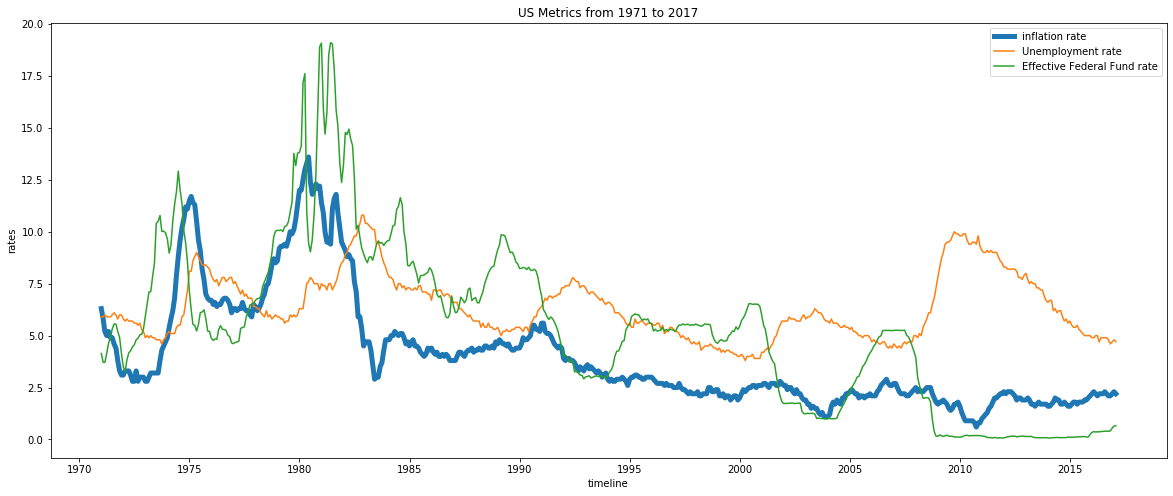

In [48]:
# matplotlib date format modules
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# define the date format
myFmt = mdates.DateFormatter('%Y')

# plot the data
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(inflation_rates['DATE'], inflation_rates['Inflation Rate'], label='inflation rate', linewidth=5)
ax.plot(inflation_rates['DATE'], inflation_rates['Unemployment Rate'], label='Unemployment rate')
ax.plot(inflation_rates['DATE'], inflation_rates['Effective Federal Funds Rate'], label='Effective Federal Fund rate')
ax.set(ylabel='rates', xlabel='timeline')
ax.set_title('US Metrics from {} to {}'.format(inflation_rates['DATE'].min().strftime('%Y'), inflation_rates['DATE'].max().strftime('%Y')))
ax.legend()

# inform axis that it is plotting dates
ax.xaxis_date() 

# use format specified as myFmt
ax.xaxis.set_major_formatter(myFmt);

This scatterplot represents the different inflation rates in the US over time, between 1954 and 2017.  It shows a downward trend for the majority of the timeline, with the maximum rate peaking close to 14%.  There are a few "mini" peaks, and we need to check if dates correspond to financial crisis in the US (ie. early and mid 1980's, 1990, 2000, and 2007) 

# Inflation Rate

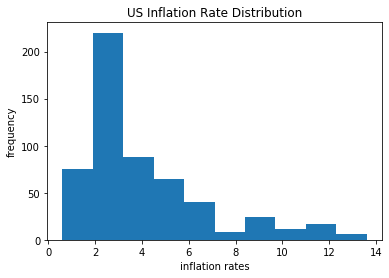

In [10]:
# histogram
plt.hist(inflation_rates['Inflation Rate'], bins=10)
plt.title('US Inflation Rate Distribution')
plt.xlabel('inflation rates')
plt.ylabel('frequency');

From this spread, it is comforting to know that +7% rates are not the most common.  It looks like a gamma distribution.  

In [19]:
# QQ plot

# 
inflation = inflation_rates['Inflation Rate']

# Sorting the values in ascending order.
inflation.sort_values()

# Making two variables.
rand1 = np.random.normal(0, 1, len(inflation_rates))
rand2 = np.random.gamma(5,1, len(inflation_rates))

# Sorting the values in ascending order.
rand1.sort()
rand2.sort()

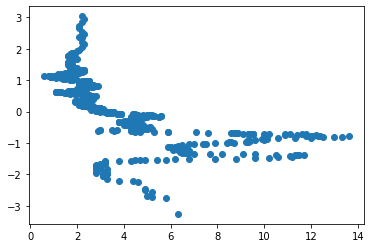

In [20]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(inflation, rand1, "o") 
plt.show()

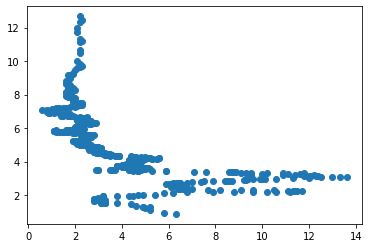

In [21]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(inflation, rand2, "o") 
plt.show()

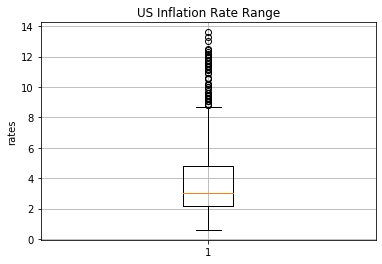

In [22]:
# boxplot
plt.boxplot(inflation_rates['Inflation Rate'].dropna())
plt.title('US Inflation Rate Range')
plt.ylabel('rates')
plt.grid();

In [23]:
mean = inflation_rates['Inflation Rate'].mean()
median = inflation_rates['Inflation Rate'].median()
rate_min = inflation_rates['Inflation Rate'].min()
rate_max = inflation_rates['Inflation Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 4.02454873646209
median: 3.0
min: 0.6
max: 13.6


# Unemployment Rate

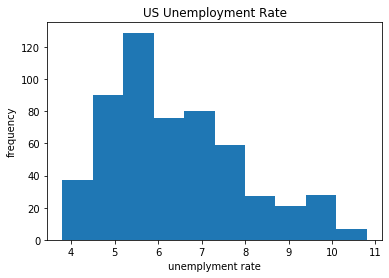

In [50]:
# histogram
plt.hist(inflation_rates['Unemployment Rate'], bins=10)
plt.title('US Unemployment Rate')
plt.xlabel('unemplyment rate')
plt.ylabel('frequency');

Looks like another gamma distribution.

In [24]:
# QQ plot

# 
unemployment = inflation_rates['Unemployment Rate']

# Sorting the values in ascending order.
unemployment.sort_values()

351     3.8
359     3.9
358     3.9
357     3.9
356     3.9
352     4.0
       ... 
146    10.3
141    10.4
144    10.4
145    10.4
143    10.8
142    10.8
Name: Unemployment Rate, Length: 554, dtype: float64

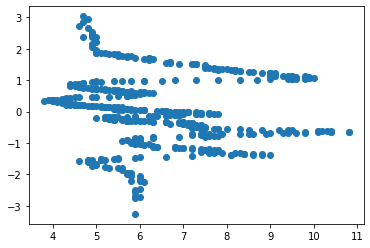

In [25]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(unemployment, rand1, "o") 
plt.show()

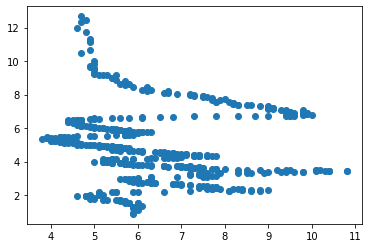

In [26]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(unemployment, rand2, "o") 
plt.show()

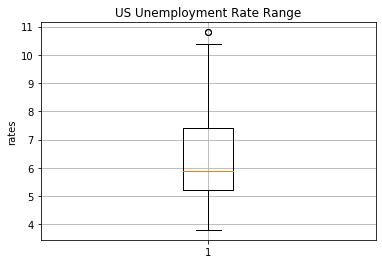

In [27]:
# boxplot
plt.boxplot(inflation_rates['Unemployment Rate'])
plt.title('US Unemployment Rate Range')
plt.ylabel('rates')
plt.grid();

In [28]:
mean = inflation_rates['Unemployment Rate'].mean()
median = inflation_rates['Unemployment Rate'].median()
rate_min = inflation_rates['Unemployment Rate'].min()
rate_max = inflation_rates['Unemployment Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 6.368411552346567
median: 5.9
min: 3.8
max: 10.8


# Effective Federal Funds Rate

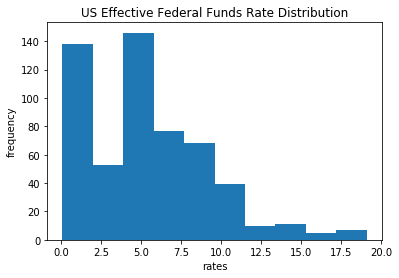

In [51]:
# histogram
plt.hist(inflation_rates['Effective Federal Funds Rate'], bins=10)
plt.title('US Effective Federal Funds Rate Distribution')
plt.xlabel('rates')
plt.ylabel('frequency');

In [30]:
# QQ plot

# 
RFF = inflation_rates['Effective Federal Funds Rate']

# Sorting the values in ascending order.
RFF.sort_values()

486     0.07
491     0.07
489     0.07
516     0.07
517     0.07
492     0.08
       ...  
127    17.82
124    18.52
119    18.90
126    19.04
120    19.08
125    19.10
Name: Effective Federal Funds Rate, Length: 554, dtype: float64

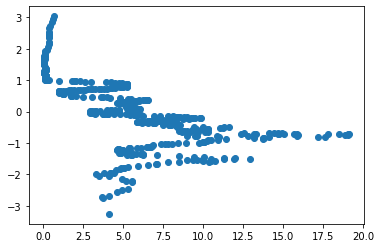

In [31]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(RFF, rand1, "o") 
plt.show()

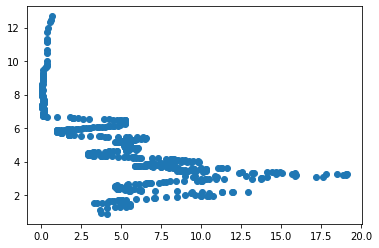

In [32]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(RFF, rand2, "o") 
plt.show()

In [ ]:
# boxplot
plt.boxplot(inflation_rates['Effective Federal Funds Rate'])
plt.title('US Federal Fund Rate Range')
plt.ylabel('rates')
plt.grid();

In [ ]:
mean = inflation_rates['Effective Federal Funds Rate'].mean()
median = inflation_rates['Effective Federal Funds Rate'].median()
rate_min = inflation_rates['Effective Federal Funds Rate'].min()
rate_max = inflation_rates['Effective Federal Funds Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

# Summary of Histogram Plots

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(inflation_rates['Inflation Rate'])
plt.title('Histogram')
plt.xlabel('inflation rates')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.hist(inflation_rates['Unemployment Rate'])
plt.title('Histogram')
plt.xlabel('unemployment rates')
plt.ylabel('frequency')

plt.subplot(2,2,3)
plt.hist(inflation_rates['Effective Federal Funds Rate'])
plt.title('Histogram')
plt.xlabel('federal reserve funds rate')
plt.ylabel('frequency')

plt.tight_layout();